<img src='https://user-images.githubusercontent.com/6457691/89746244-a6e2a200-daf3-11ea-9314-7863d544d73c.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 4*

---

# 📝 Assignment

# 1. EDA
- kaggle의 marketing promotion campaign 데이터셋을 이용합니다. 다음 링크에서 다운받으세요.

  https://www.kaggle.com/davinwijaya/customer-retention

- 데이터셋을 불러옵니다. 

- 샘플 사이즈를 확인합니다. 
  - 샘플 사이즈가 충분한지 확인해 보세요. 

- 결측치 및 데이터 타입을 확인합니다. 
  - 데이터 타입이 적절한지 확인해 보세요. 

- 중복된 데이터를 확인 후 제거합니다. 

- `history` 컬럼에서 이상치를 확인합니다.
  - box plot을 그려 보세요. 
  - histogram을 그려 보세요. 
  - 이상치를 제거합니다. 

- `used_bogo` 컬럼에서 이전에 1+1을 사용한 고객(1)과 사용하지 않은 고객(0)의 비율을 확인합니다. 
  - bar plot으로 나타내 보세요. 

In [1]:
import pandas as pd
import numpy as np
from google.colab import files

file = files.upload()

Saving data.csv to data.csv


In [2]:
df = pd.read_csv('data.csv')
df.shape
df.isnull().sum()
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)

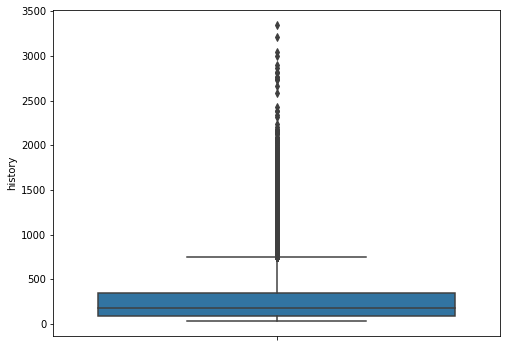

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


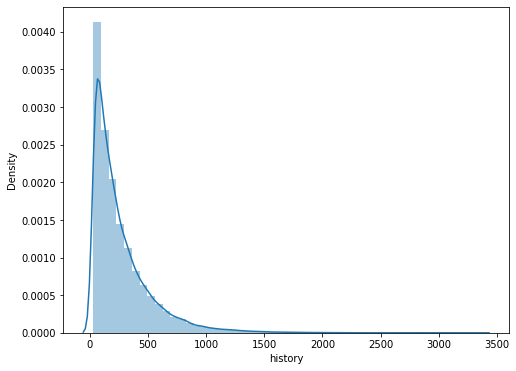

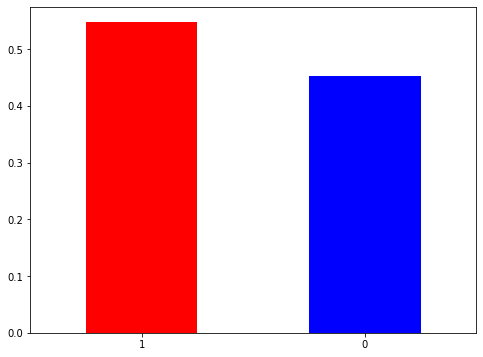

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
54225,7,86.46,0,1,Urban,0,Web,Discount,0
54226,10,105.54,1,0,Urban,0,Web,Discount,0
54227,5,38.91,0,1,Urban,1,Phone,Discount,0
54228,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


In [3]:
# history 컬럼에서 이상치를 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8,6)
sns.boxplot(y=df['history'])
plt.show()

sns.distplot(df['history'], bins = 50)
plt.show()

# 이상치 750이상으로 설정, 제거
df = df.query('history < 750')
df.reset_index(drop = True, inplace = True)

# used_bogo 컬럼에서 이전에 1+1을 사용한 고객(1)과 사용하지 않은 고객(0)의 비율을 확인
df.describe()

# bar plot 으로 시각화
per = df['used_bogo'].value_counts(normalize=True)
per.plot.bar(color = ['red','blue'], rot = 0)
plt.show()
df

# 2. 가설검정 
- 귀무가설과 대립가설을 설정하세요. 
- `used_bogo` 컬럼에 대해서 다음 전환율(CTR)을 확인하세요. 
  - 전체 데이터셋
  - 대조군(control) 그룹 (`used_bogo==0`)
  - 실험군(experiment) 그룹 (`used_bogo==1`) 
  - 두 그룹의 전환율 차이(실험군 CTR $-$ 대조군 CTR)를 변수 `ctr_diff`에 저장하세요. 
- choice method를 사용하여 가설검정을 진행한 후 결과를 해석하세요. 
  - 대조군 그룹의 귀무가설 simulate
  - 실험군 그룹의 귀무가설 Simulate
  - 실험군과 대조군 그룹 평균 차이의 귀무가설 simulate 
- binomial distribution을 사용하여 가설검정을 진행한 후 결과를 해석하세요. 
- z-test를 사용하여 가설검정을 진행한 후 결과를 해석하세요. 


In [18]:
# 귀무가설 : 이전에 1+1을 사용하지 않은 고객의 전환율은 사용한 고객의 전환율 보다 높거나 같다.
# 대립가설 : 이전에 1+1을 사용하지 않은 고객의 전환율은 사용한 고객의 전환율 보다 작다.

# used_bogo 컬럼에 대해서 다음 전환율(CTR)을 확인
ctr_pop = df['conversion'].mean()
ctr_con = df[df['used_bogo'] == 0]['conversion'].mean()
ctr_exp = df[df['used_bogo'] == 1]['conversion'].mean()
ctr_diff = ctr_exp - ctr_con

# 각 그룹의 수
n_con = df.query('used_bogo == 0').shape[0]
n_exp = df.query('used_bogo == 1').shape[0]

24544 29686


In [14]:
# choice method를 사용하여 가설검정을 진행한 후 결과를 해석
# 대조군 그룹의 귀무가설 simulate
con_null = []

for i in range(1000):
  con_sample = np.random.choice([0,1], n_con, p = [ctr_pop, 1-ctr_pop], replace = True)
  con_null.append(con_sample.mean())

In [17]:
# 실험군 그룹의 귀무가설 simulate
exp_null = []

for i in range(1000):
  exp_sample = np.random.choice([0,1], n_exp, p = [ctr_pop, 1-ctr_pop], replace = True)
  exp_null.append(exp_sample.mean())

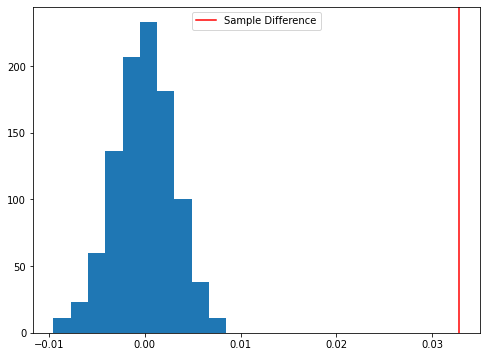

In [26]:
# 실험군과 대조군 그룹 평균 차이의 귀무가설 simulate
diff_null = np.array(exp_null) - np.array(con_null)

plt.hist(diff_null)
plt.axvline(ctr_diff, color='r', label='Sample Difference')
plt.legend();

In [28]:
(diff_null > ctr_diff).mean()

0.0

In [29]:
# 결과 분석
# 두 그룹 차이를 simulate한 분포에서 ctr_diff보다 큰 부분의 면적인 p-value 값이 0.0이므로(threshold인 0.05보다 작다) 귀무가설을 기각하고 대립가설을 채택한다.
# 이전에 1+1을 사용했던 고객의 전환율은 사용하지 않았던 고객의 전환율보다 통계적으로 유의미하게 크다고 볼 수 있다.

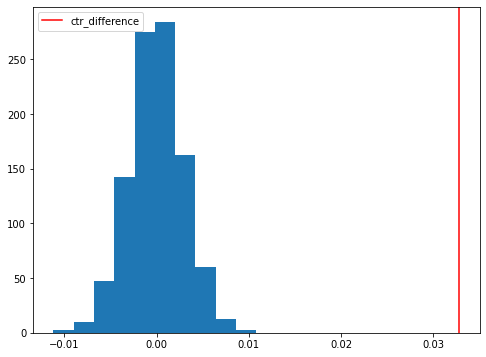

In [40]:
# binomial distribution을 사용하여 가설검정을 진행한 후 결과를 해석
bin_con = np.random.binomial(n_con, ctr_pop,1000)/n_con
bin_exp = np.random.binomial(n_exp, ctr_pop,1000)/n_exp

bin_diff = bin_exp - bin_con

plt.hist(bin_diff)
plt.axvline(ctr_diff, c='red', label = 'ctr_difference')
plt.legend();

In [41]:
(bin_diff > ctr_diff).mean()

0.0

In [ ]:
# p_value 값이 0.0이므로 귀무가설 기각, 대립가설 채택

In [46]:
# z-test를 사용하여 가설검정을 진행한 후 결과를 해석
import statsmodels.api as sm

con_conversion = df.query('used_bogo == 0')['conversion'].sum()
exp_conversion = df.query('used_bogo == 1')['conversion'].sum()

z_score, p_value = sm.stats.proportions_ztest([con_conversion, exp_conversion], [n_con, n_exp], alternative='smaller')
z_score, p_value

(-10.563140823450468, 2.2081641349563818e-26)

In [ ]:
# p_value 값이 0.05보다 작으므로 귀무가설 기각, 대립가설 채택

# 🔥 도전과제

## ANOVA

우리는 지금까지 한 표본 또는 두 표본에 대해서 가설검정을 시행해 보았습니다.

그렇다면 표본이 세 개 이상일 때는 어떻게 가설검정을 할 수 있을까요? 

다음 링크를 통해 ANOVA에 대한 글을 읽고, 주어진 4개 그룹의 평균에 대하여 차이가 있는지 가설검정을 시행하세요. 

https://partrita.github.io/posts/ANOVA-python/

```
A : 38 33 35 92 76 97 88 41 11 9
B : 18 52 62 48 30 40 87 12 97 82
C : 28 90 5 49 66 73 96 80 4 17
D : 8 99 4 12 7 64 18 10 9 20
```

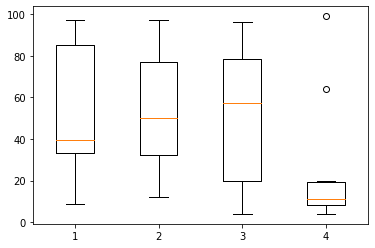

In [51]:
# 귀무가설 : 주어진 4개 그룹의 평균에 대하여 통계적으로 유의미하게 차이가 나지 않거나 같다.
# 대립가설 : 주어진 4개 그룹의 평균에 대하여 통계적으로 유의미하게 차이가 난다.

import scipy.stats as stats
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
%matplotlib inline

A = np.array([38, 33, 35, 92, 76, 97, 88, 41, 11, 9])
B = np.array([18, 52, 62, 48, 30, 40, 87, 12, 97, 82])
C = np.array([28, 90, 5, 49, 66, 73, 96, 80, 4, 17])
D = np.array([8, 99, 4, 12, 7, 64, 18, 10, 9, 20])

F_statistic, p_value = stats.f_oneway(A, B, C, D)
F_statistic, p_value

plot_data = [A,B,C,D]
ax = plt.boxplot(plot_data)
plt.show()

In [ ]:
# p_value가 0.05보다 크므로 통계적으로 유의미하게 차이가 나지 않는다.